In [104]:
from sklearn.datasets import fetch_mldata
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import time
import PIL
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
mnist = fetch_mldata('MNIST original')

#Extract training and testing data
ntrain = 60000
ntest = 10000

#Training and testing sets
indices = np.arange(len(mnist.data))
random.seed(0)

train_idx = random.sample(list(indices),ntrain)
test_idx = random.sample(list(indices),ntest)

X_train, y_train = mnist.data[train_idx], mnist.target[train_idx]
X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]

print(y_train[0])


9.0


In [26]:
# Training random forest
start_time = time.time()
n_Estimators = np.hstack((np.arange(2,100,5),100))

# Creating list of random forest with the different number of estimators
list_clf = list()
list_predictions = list()
list_accuracies = list()
list_probabilities = list()
for i,estimators in enumerate(n_Estimators):
    
    #Create the random forest
    list_clf.append(RandomForestClassifier(n_estimators=estimators, random_state=0))
    
    #Train the random forest
    list_clf[i].fit(X_train,y_train)
    
    #Make a prediction of the labels
    list_predictions.append(list_clf[i].predict(X_test))
    
    list_accuracies.append(list_clf[i].score(X_test,y_test))
    
    list_probabilities.append(list_clf[i].predict_proba(X_test))
    
print(len(list_clf))
print("My computer took: ", time.time() - start_time)

21
('My computer took: ', 406.66708493232727)


In [27]:
#Back up of lists
list_clf_bk = list_clf
list_predictions_bk = list_predictions
list_accuracies_bk = list_accuracies
list_probabilities_bk = list_probabilities

In [28]:
print(list_probabilities[20])

[[0.04 0.   0.   ... 0.13 0.02 0.74]
 [0.01 0.   0.98 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   1.  ]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.01 ... 0.79 0.02 0.16]
 [0.   0.   0.02 ... 0.   0.05 0.  ]]


In [ ]:
# Does the accuracy and uncertainty improve by having more members in each ensemble?
# -> Yes
# NOTE: Mihir ellaborate on this.



4- Using a single ensemble of your choosing, find the misclassified examples in the test set and analyze the uncertainity of those examples. Can the uncertainty explain why those examples are misclassified?. 

In [134]:
forest_52 = list_clf[10]
predictions_52 = list_predictions[10]
proba_52 = list_probabilities[10]

misclassified_idx = []
for i in range(len(y_test)):
    if predictions_52[i] != y_test[i]:
        misclassified_idx.append(i)
print misclassified_idx

[146, 192, 240, 404, 1139, 1194, 1631, 1727, 2177, 2197, 2318, 2345, 2402, 2418, 2493, 2631, 2881, 2889, 3180, 3218, 3541, 3778, 3780, 3882, 3963, 4210, 4354, 4635, 4990, 5174, 5193, 5284, 5527, 5565, 5585, 5824, 5831, 5882, 6216, 6631, 6671, 6887, 6978, 7943, 8091, 8111, 8115, 8917, 9323, 9588, 9897]


In [94]:
print("Predicted class: ", predictions_52[240])
print("True class: ", y_test[240])
a = sorted(proba_52[240], reverse=True)
print(a[0:2])

('Predicted class: ', 8.0)
('True class: ', 0.0)
[0.4423076923076923, 0.11538461538461539]


('Predicted class: ', 8.0)
('True class: ', 0.0)


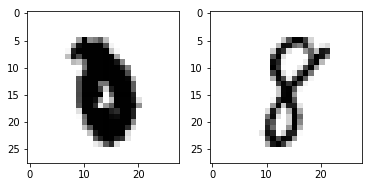

('Predicted class: ', 8.0)
('True class: ', 8.0)


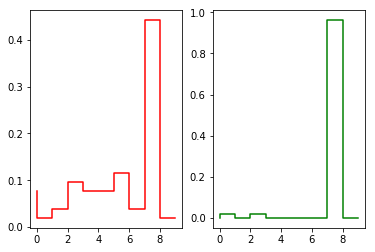

In [141]:
#Sushma plot histogram :)
plt.xlabel('Classes')
plt.ylabel('Probabilities of misclassified example')

#Misclassified example
print("Predicted class: ", predictions_52[240])
print("True class: ", y_test[240])
plt.subplot(1, 2, 1)
plt.imshow(X_test[240].reshape(28,28), cmap='binary' )
plt.subplot(1, 2, 2)
plt.imshow(X_test[260].reshape(28,28), cmap='binary' )
plt.show()

#Correctly calssified example
print("Predicted class: ", predictions_52[260])
print("True class: ", y_test[260])

plt.xlim(1,9)
plt.ylim(0, 1)
bins = np.arange(0,10)
plt.subplot(1, 2, 1)
plt.step(bins, proba_52[240], color='r')
plt.subplot(1, 2, 2)
plt.step(bins, proba_52[260], color='g')
plt.show()


In [125]:
x_train = np.random.randint(-4,4, size=20)
noise = np.random.normal(0,3**2,20)
y_train = x_train**3 + noise
print(y_train)
x_train = x_train.reshape((-1,1))
crf = RandomForestClassifier(n_estimators=10, random_state=0)
crf.fit(x_train,y_train)

[-17.97974357 -54.21813748 -45.72789103 -70.53529926   4.9147629
   1.85299387 -72.81363272  -3.32310804   9.46253708  -7.19702063
  17.24298234  26.59296332  -6.63772302  -1.54601033 -59.44685592
  -7.38855041  27.98242206   1.99119689 -33.76767484  24.52562436]


ValueError: Unknown label type: 'continuous'

In [101]:
x_test = np.arange(-6,7)
y_test = x_test**3 + noise
crf = RandomForestClassifier(n_estimators=10, random_state=0)
crf.fit(x_train,y_train)

predict = crf.predict(x_test)




plt.scatter(x_train,y_train,color='r')
plt.plot(x_test,y_test,'b')

ValueError: Expected 2D array, got 1D array instead:
array=[-4. -3. -2. -1.  0.  1.  2.  3.  4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [124]:
print(list_clf[0].estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=209652396, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=398764591, splitter='best')]
